# Histograms

Histograms are very useful for comprehending such things as [[*](https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935)]:
>- Exposure
- Contrast
- Dynamic Range
- Saturation

One might think this would be a mindless one-liner. But one might also find oneself wasting about three days experimenting with various Python charting packages to get an acceptable looking dual histogram of 256 bins/bars.

To be fair the "challenging" part of the data was the 256 bars, whereas most charting packages seemingly assume many fewer bars, say, at most fifty.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

from google.colab.data_table import DataTable

## Matplotlib

Matplotlib can do histogram easily enough. `bins='auto'` seems to work well when data is in 8-bit intensities i.e. 0..255.

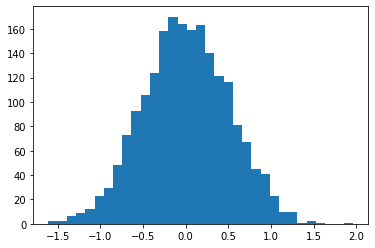

In [5]:
mu, sigma = 0, 0.5

measurements_to_simulate = 2000
measured = np.random.normal(mu, sigma, measurements_to_simulate)
hist, edges = np.histogram(measured, density=True, bins=256)

rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(measured, bins='auto')

Not very interactive. No zoom and pan. But surely someone has dones that for good old MPL.

## Seaborn

[Seaborn turned out to be fucking massive pain in the ass in this situation, cause all manner of plot ugliness b/c it seemingly isn't prepared for a histogram of 256 bars (styling edges white => visual noise). Only looks good around a max of 32 bar.]

For a dual histogram plot, the Matplotlab trick is `twinx()` which makes the X axis be a siamese twin, returning the new second twin to config. The twins axes share their x-axis.


In [0]:
# sns.set(style='dark')
# sns.distplot(image.ravel(), bins = 256, kde=False)
#sns.set_style('dark')
#sns.set_style({'patch.edgecolor': 'b'}) # This prevents style error to lots of verticle lines, seaborn overstyling the bars
#plt.rcParams["patch.linewidth"] = 0.001 # suppress plotting error noise

# TODO: isn't this wrong? not relative lum'd?
#NOOOOOO.  ax = plt.hist(image.ravel(), bins = 256, color='lightgray')

# TODO: guessing on seaborn magic BS
#plt.show()

In [9]:
# zip hist and cumm_hist into a DataFrame.
import pandas as pd

eight_bit_range = np.arange(0, 256, 1)
# hist is an array of single element arrays of one float?
# Same for hist.cumsum() but simple array of floats? weird diff.
hist_dressed_up = np.asarray(hist.flatten(), dtype='int32')

hist_cumulative = hist.cumsum()

collated = zip(eight_bit_range, hist_dressed_up, hist_cumulative)

# TODO: rename this intensities
pixels_hist_df = pd.DataFrame(collated, columns=['intensity','count', 'cumm_count'], dtype=np.int32)

DataTable(pixels_hist_df)


,intensity,count,cumm_count
0,0,0,0.071763
1,1,0,0.071763
2,2,0,0.071763
3,3,0,0.071763
4,4,0,0.071763
...,...,...,...
251,251,0,71.727552
252,252,0,71.727552
253,253,0,71.727552
254,254,0,71.727552


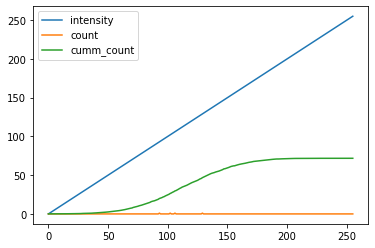

In [10]:
pixels_hist_df.plot()

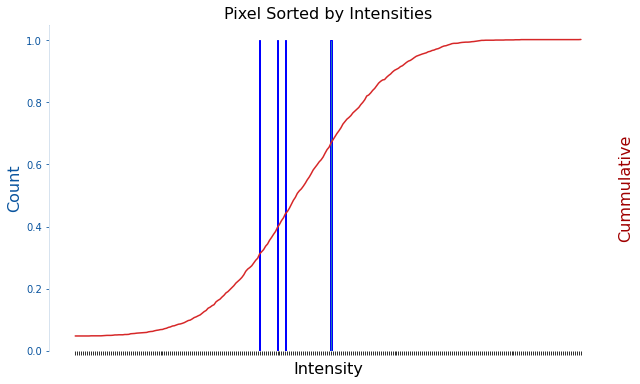

In [13]:

#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6)) #, constrained_layout=True)
#sns.set_style('white') # this will trigger the bug
plt.subplots_adjust(wspace=0.01, hspace=0.01)

#plt.rcParams["axes.grid"] = False
#plt.rcParams["patch.linewidth"] = 0.001 # suppress plotting error noise
sns.set_style('dark', {'patch.edgecolor': 'b', 
                       'patch.facecolor': 'g', 
                       'patch.linewidth': 4,
                       'patch.force_edgecolor': True
                       }) 
#{"xtick.major.size": 8, "ytick.major.size": 8}
hist_color = '#0b559f'

# Turn off border box
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.spines['left'].set_color(hist_color)

# Histogram as bars
color = 'tab:blue'
ax1.set_title('Pixel Sorted by Intensities', fontsize=16)
ax1 = sns.barplot(x='intensity', y='count', data = pixels_hist_df, color=color, saturation=1) # , palette='summer'  palette='Blues_d', )
ax1.set_xlabel('Intensity', fontsize=16)
ax1.set_ylabel('Count', color=hist_color, fontsize=16)
ax1.yaxis.label.set_color(hist_color)
ax1.tick_params(axis='y', color=hist_color, labelcolor=hist_color) #color='#0b559f')

# specify we want to share the same x-axis
ax2 = ax1.twinx() # This is the code to get two subplots sharing the same X axis
sns.despine(ax=ax2, bottom=True)

# Cummulative histogram as line
color = 'tab:red'
ax2.set_ylabel('Cummulative total pixels', fontsize=16)
ax2 = sns.lineplot(x='intensity', y='cumm_count', data=pixels_hist_df, sort=False, color=color) #, rc={})
ax2.tick_params(axis='y', right=False, color='red')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylabel('Cummulative', color='#a00000')
pass

And with that, it's good enough. Time to move beyond Matplotlib and Seaborn to a more interactive UI library so that we can start putting zoom and handles and such into the mix.

## Plotly

This is code that was not worked until success but might be returned to later.

This is not something that plotly is really recommending nor were implementations to found at hand. **TODO:** there is probably a way to do this; might involve pouring all data into a DataFrame and then expressing hist vs cumm_hist as calls into plotly.

In [14]:
pixels = np.array(gray.ravel())
pixels_hist = np.histogram(pixels, bins=256, density=True)
pixels_hist_cummulative = np.cumsum(pixels_hist[0])

#fig = go.Figure(data=go.Scatter(x=pixels_hist[1], y=pixels_hist_cummulative))
fig = go.Figure(data=[go.Histogram(x=gray.ravel(), cumulative_enabled=False)])

fig.show()


NameError: ignored

In [0]:
# sns.set_style('white')

plt.figure() #figsize=(3,3))
plt.hist(image.ravel(), bins = 256, cumulative = True)
plt.show()


## Bokeh

Don't forget to run `output_notebook()` once else silent fail from Bokeh calls.


In [0]:
from bokeh.io import output_notebook
output_notebook()


### Prior art

- [ ] [Charts in Colaboratory](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=N-u5cYwpS-y0)
- [Visualizing Data with Bokeh and Pandas](https://programminghistorian.org/en/lessons/visualizing-with-bokeh): WWII bombing tonage time series
- [Interactive Histograms with Bokeh](https://towardsdatascience.com/interactive-histograms-with-bokeh-202b522265f3)


### `quad()`

The following `quad()` based rendering unfortuneately has horizontal gaps i.e. pixel-wide vertical white line artifacts.

This technique actually comes from the Bokeh docs gallery, [histogram.html](https://docs.bokeh.org/en/latest/docs/gallery/histogram.html)

Note, the first two lines need to be added to make Bokeh example notebooks work on Colab [[*](https://stackoverflow.com/a/48305712/4669056)]:
```python
from bokeh.io import output_notebook
output_notebook()
```

Other than that, set `p.quad(…fill_color="navy", line_color="navy"…)` and for the upper left sub-plot, set # of bins to 256, rather than the others at 50. Notice how the upper left plot suffers from white vertical line artifacts.


In [17]:
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show


def make_plot(title, hist, edges, x, pdf, cdf):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="navy", alpha=0.5)
    p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
    p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p

# Normal Distribution

mu, sigma = 0, 0.5

measurements_to_simulate = 2000
measured = np.random.normal(mu, sigma, measurements_to_simulate)
hist, edges = np.histogram(measured, density=True, bins=256)

x = np.linspace(-2, 2, measurements_to_simulate)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1 = make_plot("Normal Distribution (μ=0, σ=0.5)", hist, edges, x, pdf, cdf)

# Log-Normal Distribution

mu, sigma = 0, 1.0 #0.5

measured = np.random.lognormal(mu, sigma, measurements_to_simulate)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, measurements_to_simulate)
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2

p2 = make_plot("Log Normal Distribution (μ=0, σ=0.5)", hist, edges, x, pdf, cdf)

# Gamma Distribution

k, theta = 7.5, 1.0

measured = np.random.gamma(k, theta, measurements_to_simulate)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, measurements_to_simulate)
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta)

p3 = make_plot("Gamma Distribution (k=7.5, θ=1)", hist, edges, x, pdf, cdf)

# Weibull Distribution

lam, k = 1, 1.25
measured = lam*(-np.log(np.random.uniform(0, 1, measurements_to_simulate)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, measurements_to_simulate)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4 = make_plot("Weibull Distribution (λ=1, k=1.25)", hist, edges, x, pdf, cdf)

output_file('histogram.html', title="histogram.py example")


show(gridplot([p1,p2,p3,p4], ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

The unfortuneate horizontal gaps i.e. pixel-wide vertical white line artifacts are not evident when single plotting i.e. no sub-plots as above.

In [18]:
from bokeh.models import ColumnDataSource, Step
from bokeh.models import LinearAxis, Range1d

mu, sigma = 128, 40.0 # 0.5

measurements_to_simulate = 2000
measured = np.random.normal(mu, sigma, measurements_to_simulate)
hist, edges = np.histogram(measured, density=True, bins=256)

print(hist.max(axis=0))

# y_height = hist.max()
#y_height = hist.max()
y_height = 32

# Note need x_range and y_range here to define x and y limits for 1st sub-plots axises
p_jft = figure(title='Dual Histogram', background_fill_color="#fafafa", x_range=(0,255), y_range=(0,y_height))

# Navy blue solid block of bars (hopefully)
hist, edges = np.histogram(measured, density=False, bins=256)

p_jft.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="navy", alpha=1.0)

# [0, 1, ..., 255]
eight_bit_range = [*range(0, 256, 1)]

# Red line for cummulative total:
# How to get "twin axes": two plots sharing x, having different y ranges
#   https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html#twin-axes
#p_jft.extra_y_ranges = {"foo": Range1d(start=0, end=measurements_to_simulate*1.05)}
#p_jft.step(eight_bit_range, pixels_hist_df['cumm_count'], line_width=1, line_color='darkred', mode="center", y_range_name='foo')

show(p_jft)

0.012418151103810044


So, `quad()` can do the job of drawing one rectagle per bar but that's kinda a hack.

### `vbar()`

`vbar()` has the semantics of a histogram and so the code is less hacky. The following is straight out of the Bokeh docs.

In [8]:
from bokeh.plotting import figure, output_file, show

p = figure(plot_width=400, plot_height=400)
p.vbar(x=[1, 2, 3], width=0.5, bottom=0,
       top=[1.2, 2.5, 3.7], color="firebrick")
show(p)

Next, just change `width=1.0` to get a solid block of red.

In [9]:
p = figure(plot_width=400, plot_height=400)
p.vbar(x=[1, 2, 3], width=1.0, bottom=0,
       top=[1.2, 2.5, 3.7], color="firebrick")
show(p)

In [10]:
from bokeh.plotting import figure, output_file, show

plot = figure(plot_width=300, plot_height=300)
plot.vbar(x=[1, 2, 3], width=0.5, bottom=0, top=[1,2,3], color="#CAB2D6")

show(plot)

For a low number of bars, a solid block certainly does not look like an improvement but the goal here is to have 256 bars.

In [21]:
p = figure(plot_width=400, plot_height=400)
p.vbar(x=eight_bit_range, width=1.0, bottom=0,
       top=hist, color="navy")
show(p)

## OpenCV

- https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html
  - https://github.com/opencv/opencv/blob/master/samples/python/hist.py#L47
- https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html